# Full Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras    # Used only to import MNIST dataset
#import tensorflow as tf  

mnist = keras.datasets.mnist

def sigmoid(x, diff = False):
    g = 1 / (1 + np.exp(-x))
    if not diff:
        y = g
    else:
        y = g*(1 - g)
    return y

def relu(x, diff = False):
    if not diff:
        y = np.maximum(x, 0)
    else:
        y = (x > 0) * 1
    return y

def softmax(x):
    y = np.exp(x)
    return y / np.sum(y, axis=0)

## Load the images

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Scale the grayscale values [0, 255] into [0, 1]
X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(60000, 784)
X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(10000, 784)

# Convert the target values into a "one hot" array,
# for axample: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_train = np.zeros((60000, 10))
Y_test = np.zeros((10000, 10))
for k in range(0, 60000):
    Y_train[k, y_train[k]] = 1
for k in range(0, 10000):
    Y_test[k, y_test[k]] = 1
    
X_train = np.transpose(X_train)   # 784 x 60000
X_test = np.transpose(X_test)     # 784 x 10000
Y_train = np.transpose(Y_train)   # 10 x 60000
Y_test = np.transpose(Y_test)     # 10 x 10000

## Train the network using the backpropagation algorithm

Epoch 0 :	 J =  2.3020041655616432 	 J_test =  2.3014957988883418
Epoch 10 :	 J =  2.2117251491899137 	 J_test =  2.0594958679597997
Epoch 20 :	 J =  0.5151302053272306 	 J_test =  0.4943344802480209
Epoch 30 :	 J =  0.33445714104789803 	 J_test =  0.32791341335197
Epoch 40 :	 J =  0.23471142035310968 	 J_test =  0.23447730017879448
Epoch 50 :	 J =  0.18266464209131025 	 J_test =  0.1895319710614657
Epoch 60 :	 J =  0.15350545684602243 	 J_test =  0.1652206200761759
Epoch 70 :	 J =  0.13261850412106213 	 J_test =  0.14896510900274115
Epoch 80 :	 J =  0.11617640088787455 	 J_test =  0.1382927522907796
Epoch 90 :	 J =  0.10282524357222367 	 J_test =  0.13066709989864908


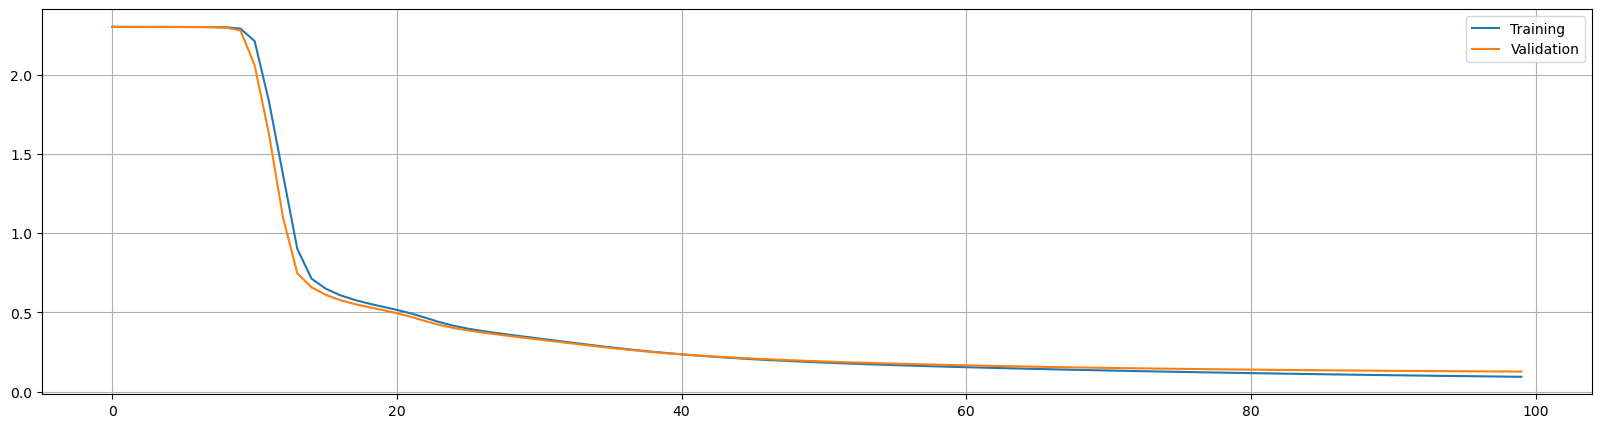

In [4]:
# Initialize the coefficients
W1 = np.random.randn(32, 784) * 0.01
b1 = np.zeros((32, 1))
W2 = np.random.randn(32, 32) * 0.01
b2 = np.zeros((32, 1))
W3 = np.random.randn(10, 32) * 0.01
b3 = np.zeros((10, 1))

# Batch size m = 100: 60000 / 100 = 600 batches
alpha = 0.01  # Learning Rate
costs = []
costs_test = []
m = 100

# Training
for epoch in range(100):
    J = 0
    
    for k in range(600):
        X = X_train[:, m*k : m*(k+1)]
        Y = Y_train[:, m*k : m*(k+1)]
        
        # Forward pass
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2)
        Z3 = np.dot(W3, A2) + b3
        A3 = softmax(Z3) 
        
        # Calculate the derivatives
        dZ3 = A3 - Y
        dA2 = np.dot(W3.T, dZ3)
        dZ2 = relu(Z2, diff = True) * dA2
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = relu(Z1, diff = True) * dA1
        
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dW3 = np.dot(dZ3, A2.T) / m
        db3 = np.sum(dZ3, axis=1, keepdims=True) / m
        
        # Update the coefficients using Gradient Descent
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W3 = W3 - alpha * dW3
        b3 = b3 - alpha * db3
        
        # Update the cost function
        J = J - np.sum(Y * np.log(A3))
        
    J = J / 60000
    costs.append(J)
    
    # Validation
    X = X_test
    Y = Y_test
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    # Cost function for the validation set
    J_test = - np.sum(Y * np.log(A3)) / 10000
    costs_test.append(J_test)
    
    if (epoch % 10 == 0):
        print('Epoch', epoch, ':\t J = ', J, '\t J_test = ', J_test)
    
plt.figure(figsize=(20, 5))
plt.plot(costs, label="Training")
plt.plot(costs_test, label="Validation")
plt.legend()
plt.grid()
plt.show()

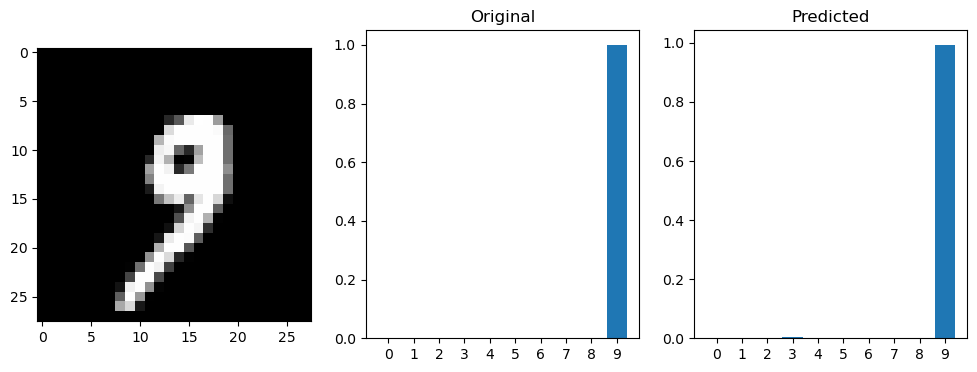

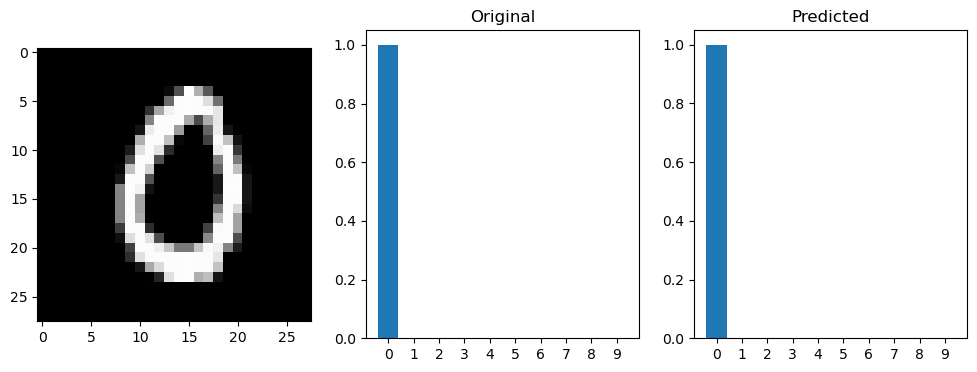

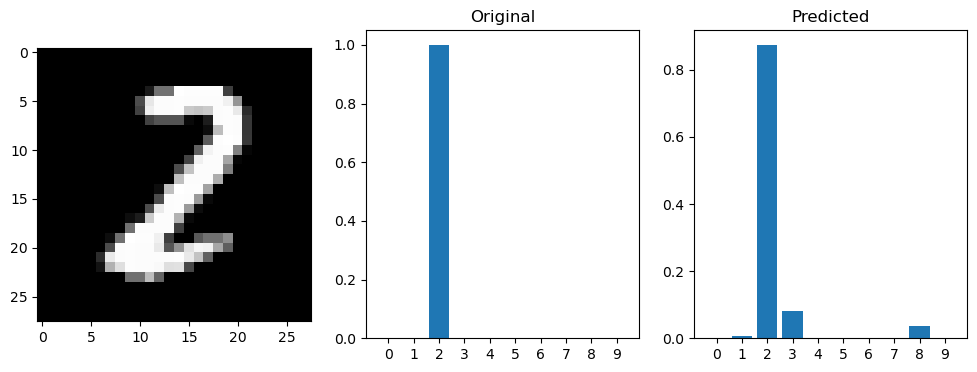

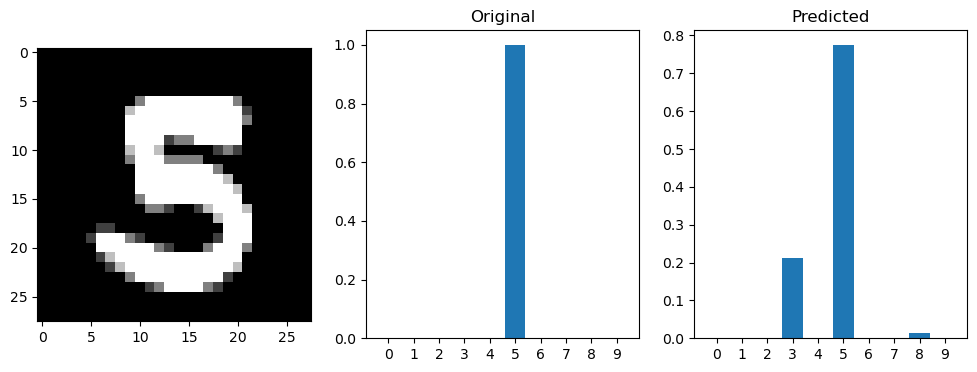

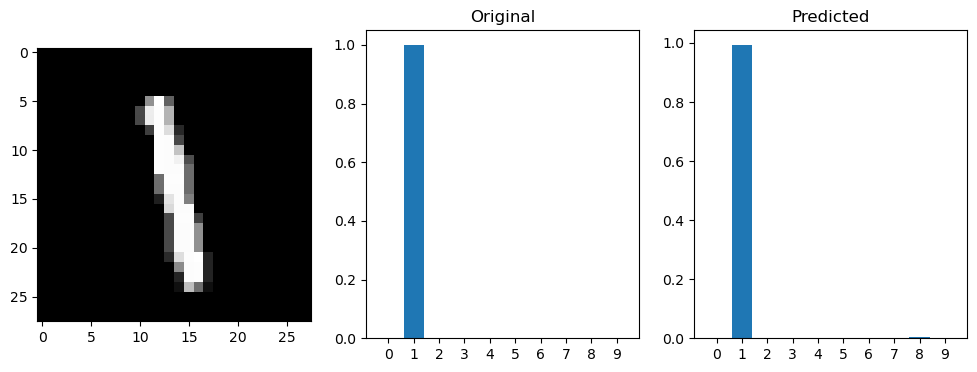

In [5]:
start = 1000  # <= Change this to choose a test image [0, 9999]

for n in range(start, start+5):
    # This is the Complete Neural Network Forward Pass
    X = X_test[:, n].reshape(784, 1)
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    # Compare the prediction with the correct label
    Y = Y_test[:, n].reshape((10, 1))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    image = X_test[:, n].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    
    ind = np.arange(0, 10)
    plt.subplot(1, 3, 2)
    plt.bar(ind, Y.flatten())
    plt.xticks(range(10))
    plt.title('Original')
    
    plt.subplot(1, 3, 3)
    plt.bar(ind, A3.flatten())
    plt.xticks(range(10))
    plt.title('Predicted')
    
    plt.show()


In [6]:
n_correct = 0  # Number of correctly classified images

for k in range(0, 10000):
    X = X_test[:, k].reshape((784,1))
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    if (np.argmax(A3) == y_test[k]):
        n_correct = n_correct + 1
        
print('Accuracy =', n_correct/10000)

Accuracy = 0.9634
